# ❓ <font color='green'> <u> PROBLEM STATEMENT (Gas_Turbines) </u>

## 🔵 <font color='blue'> Predicting Turbine Energy Yield (TEY) using ambient variables as features.

#### The Dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
#### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

    
### <font color='candy'>➡Attribute Information:

#### The explanations of sensor measurements and their brief statistics are given below.

+ **Variable -- (Abbr.) -- Unit -- Min -- Max -- Mean**
+ **Ambient temperature (AT)** -- C â€“-- 6.23 -- 37.10 -- 17.71
+ **Ambient pressure (AP)** -- mbar -- 985.85 -- 1036.56 -- 1013.07
+ **Ambient humidity (AH)**-- (%) -- 24.08 -- 100.20 -- 77.87
+ **Air filter difference pressure (AFDP)** -- mbar -- 2.09 -- 7.61 -- 3.93
+ **Gas turbine exhaust pressure (GTEP)** -- mbar -- 17.70 -- 40.72 -- 25.56
+ **Turbine inlet temperature (TIT)** -- C -- 1000.85 -- 1100.89 -- 1081.43
+ **Turbine after temperature (TAT)** -- C -- 511.04 -- 550.61 -- 546.16
+ **Compressor discharge pressure (CDP)** -- mbar -- 9.85 -- 15.16 -- 12.06
+ **Turbine energy yield (TEY**) -- MWH -- 100.02 -- 179.50 -- 133.51
+ **Carbon monoxide (CO)** -- mg/m3 -- 0.00 -- 44.10 -- 2.37
+ **Nitrogen oxides (NOx)** -- mg/m3 -- 25.90 -- 119.91 -- 65.29

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> What are Neural Networks?</u></font> 
+ #### Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

+ #### Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

+ ###  <font color='candy'><u> Structure of Neural Networks
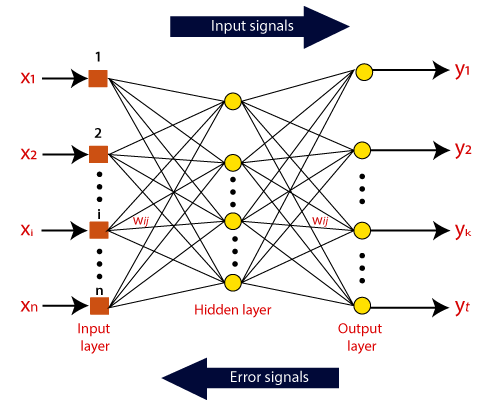

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Datasets_Assignments/main/gas_turbines.csv')
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [2]:
df.shape

(15039, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [4]:
df.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

In [5]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df.duplicated().sum()

0

> * #### There are 15039 records and 11 Variables.
> * #### All variables are of proper data type.
> * #### "TEY" is target column.
> * #### All variables are in provided range.
> * #### There is no null value observed.
> * #### No duplicated value present.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

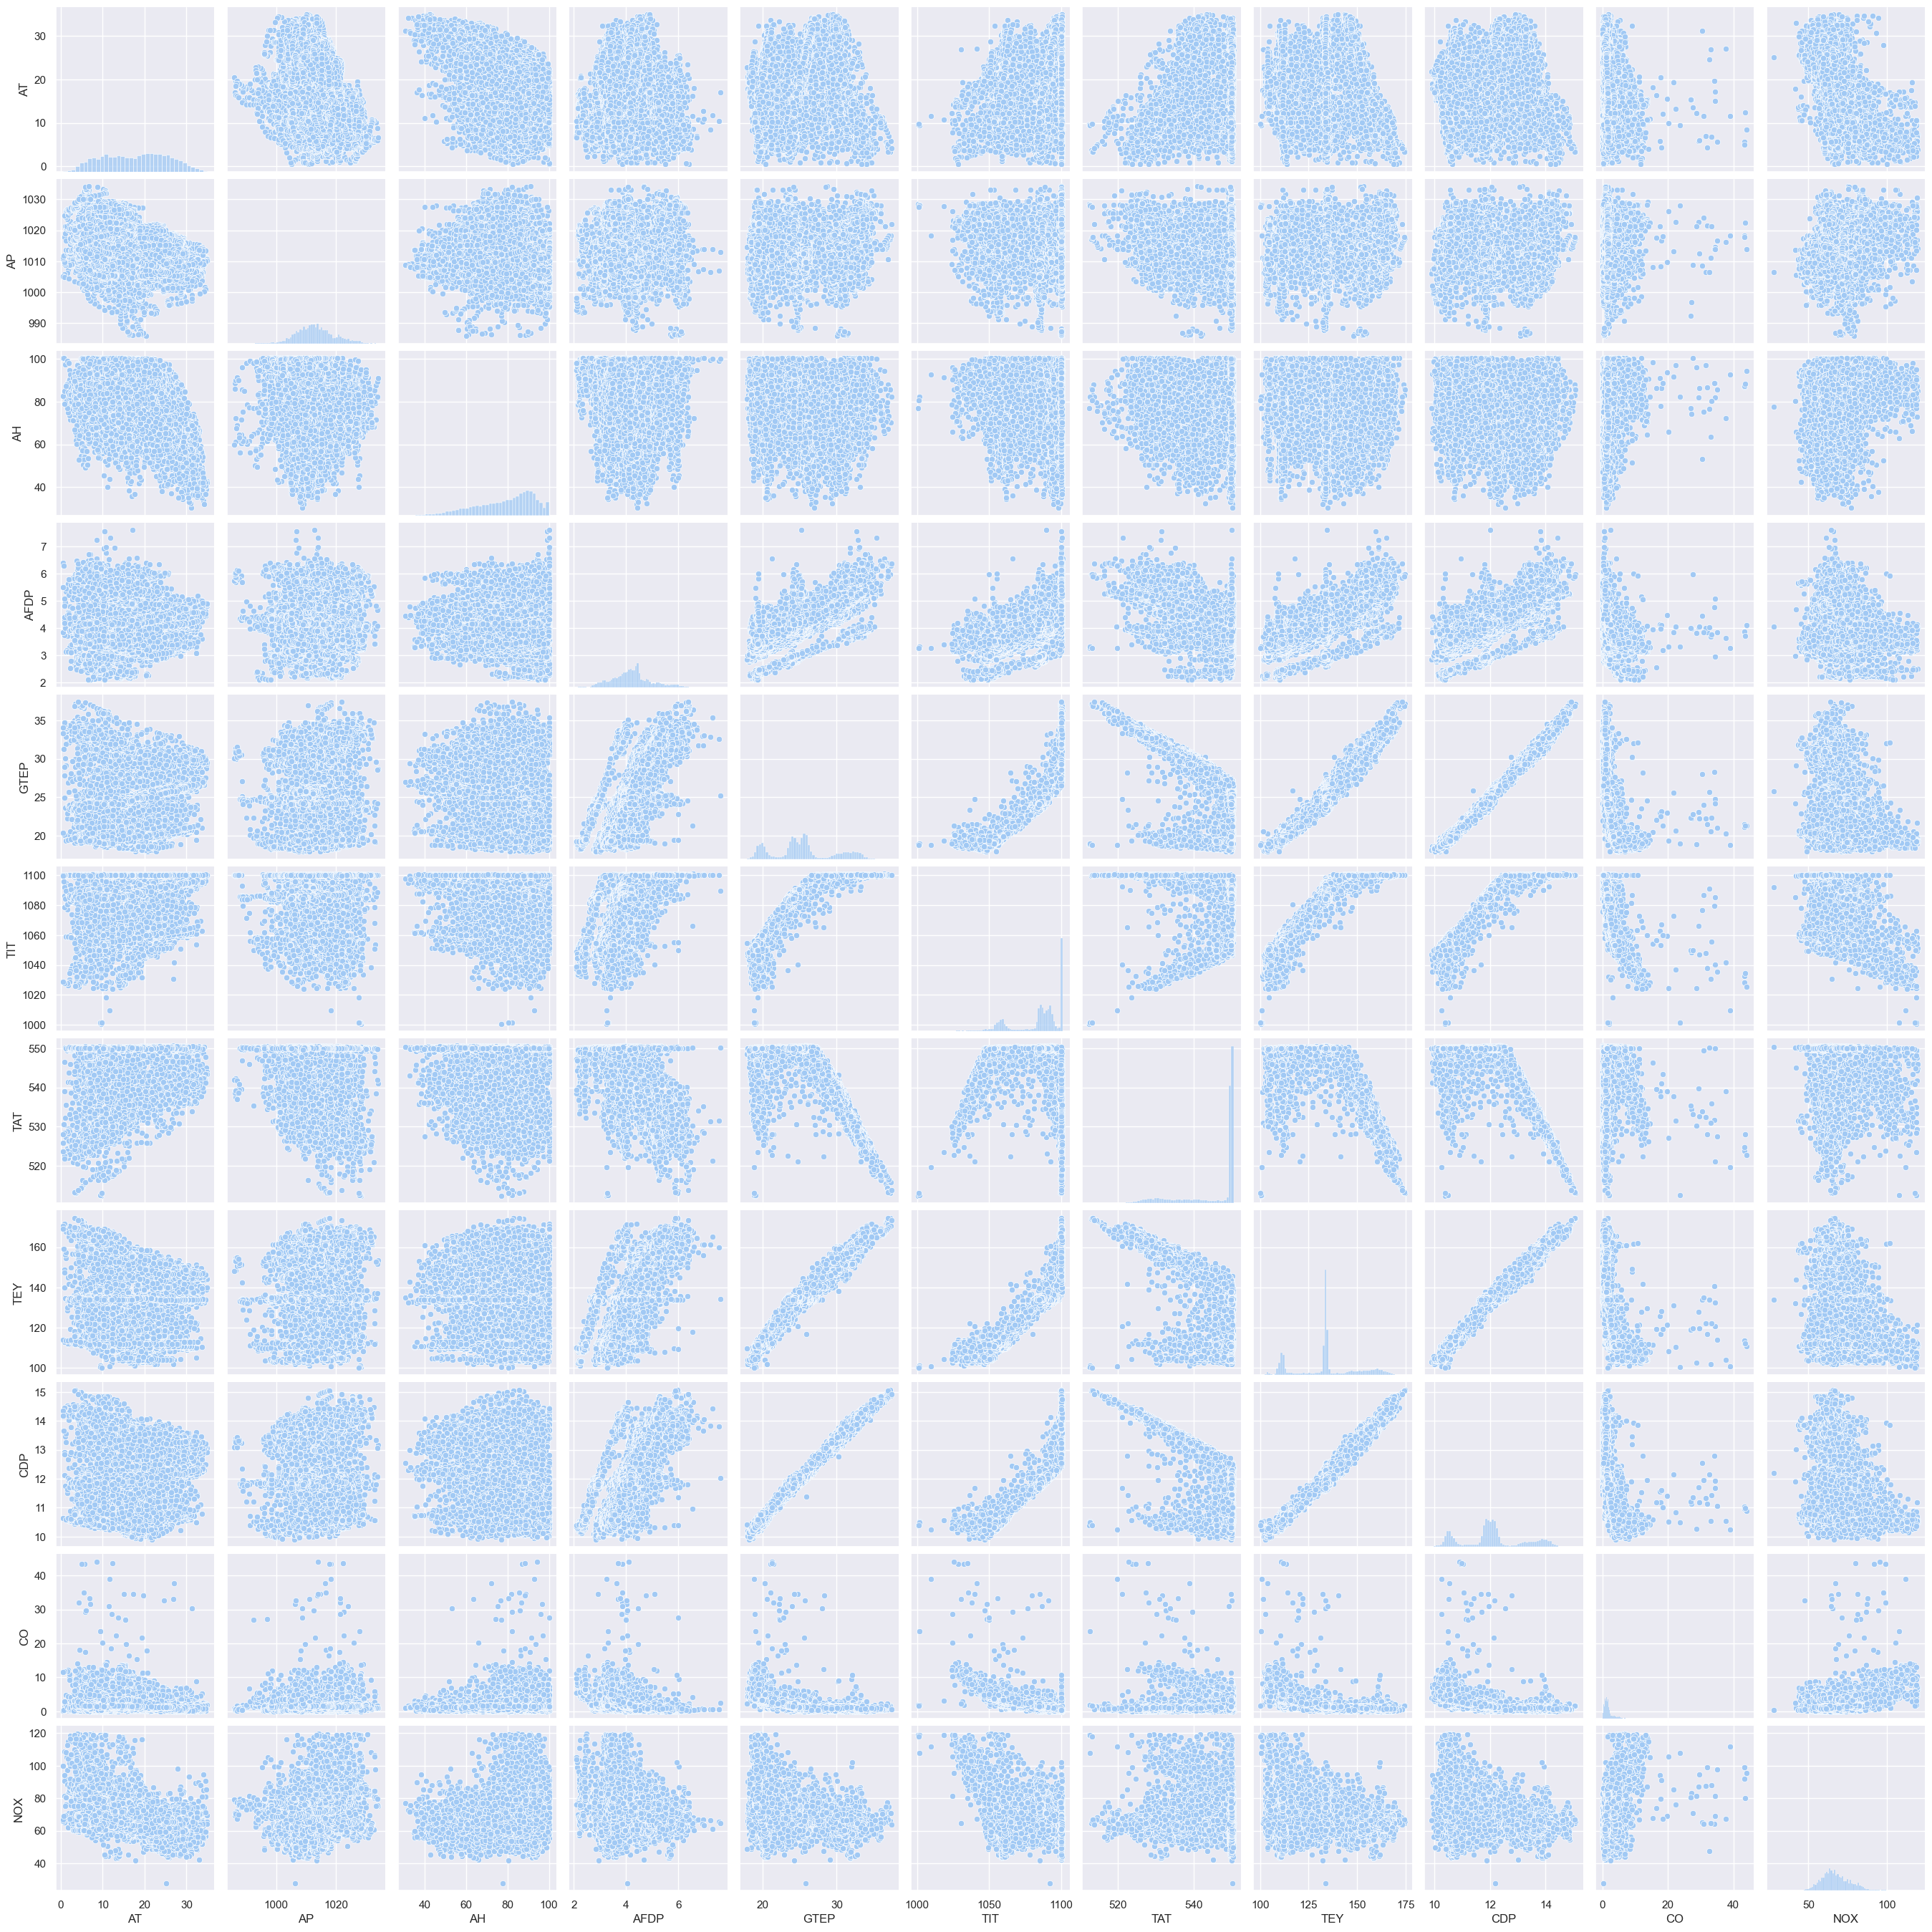

In [7]:
# Scatterplot :
sns.pairplot(df)

<Axes: >

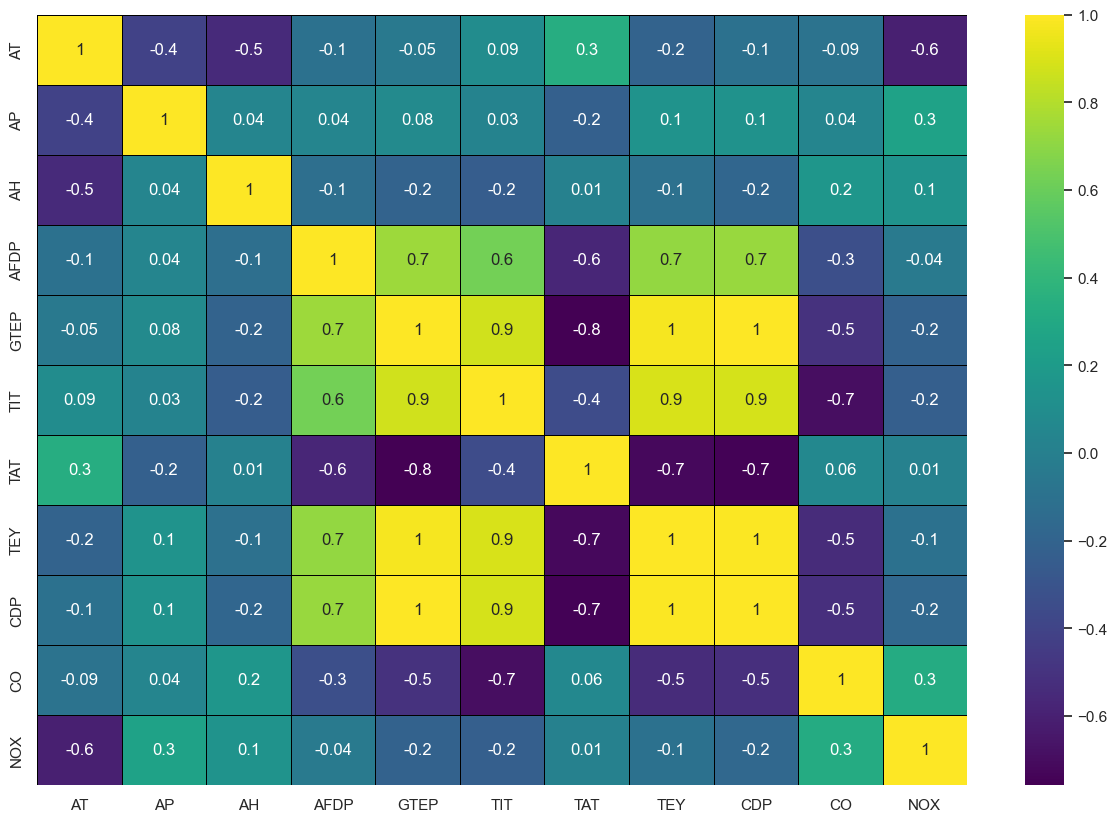

In [8]:
# Correation between Numerical variables:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", linewidths=0.5, linecolor='black')

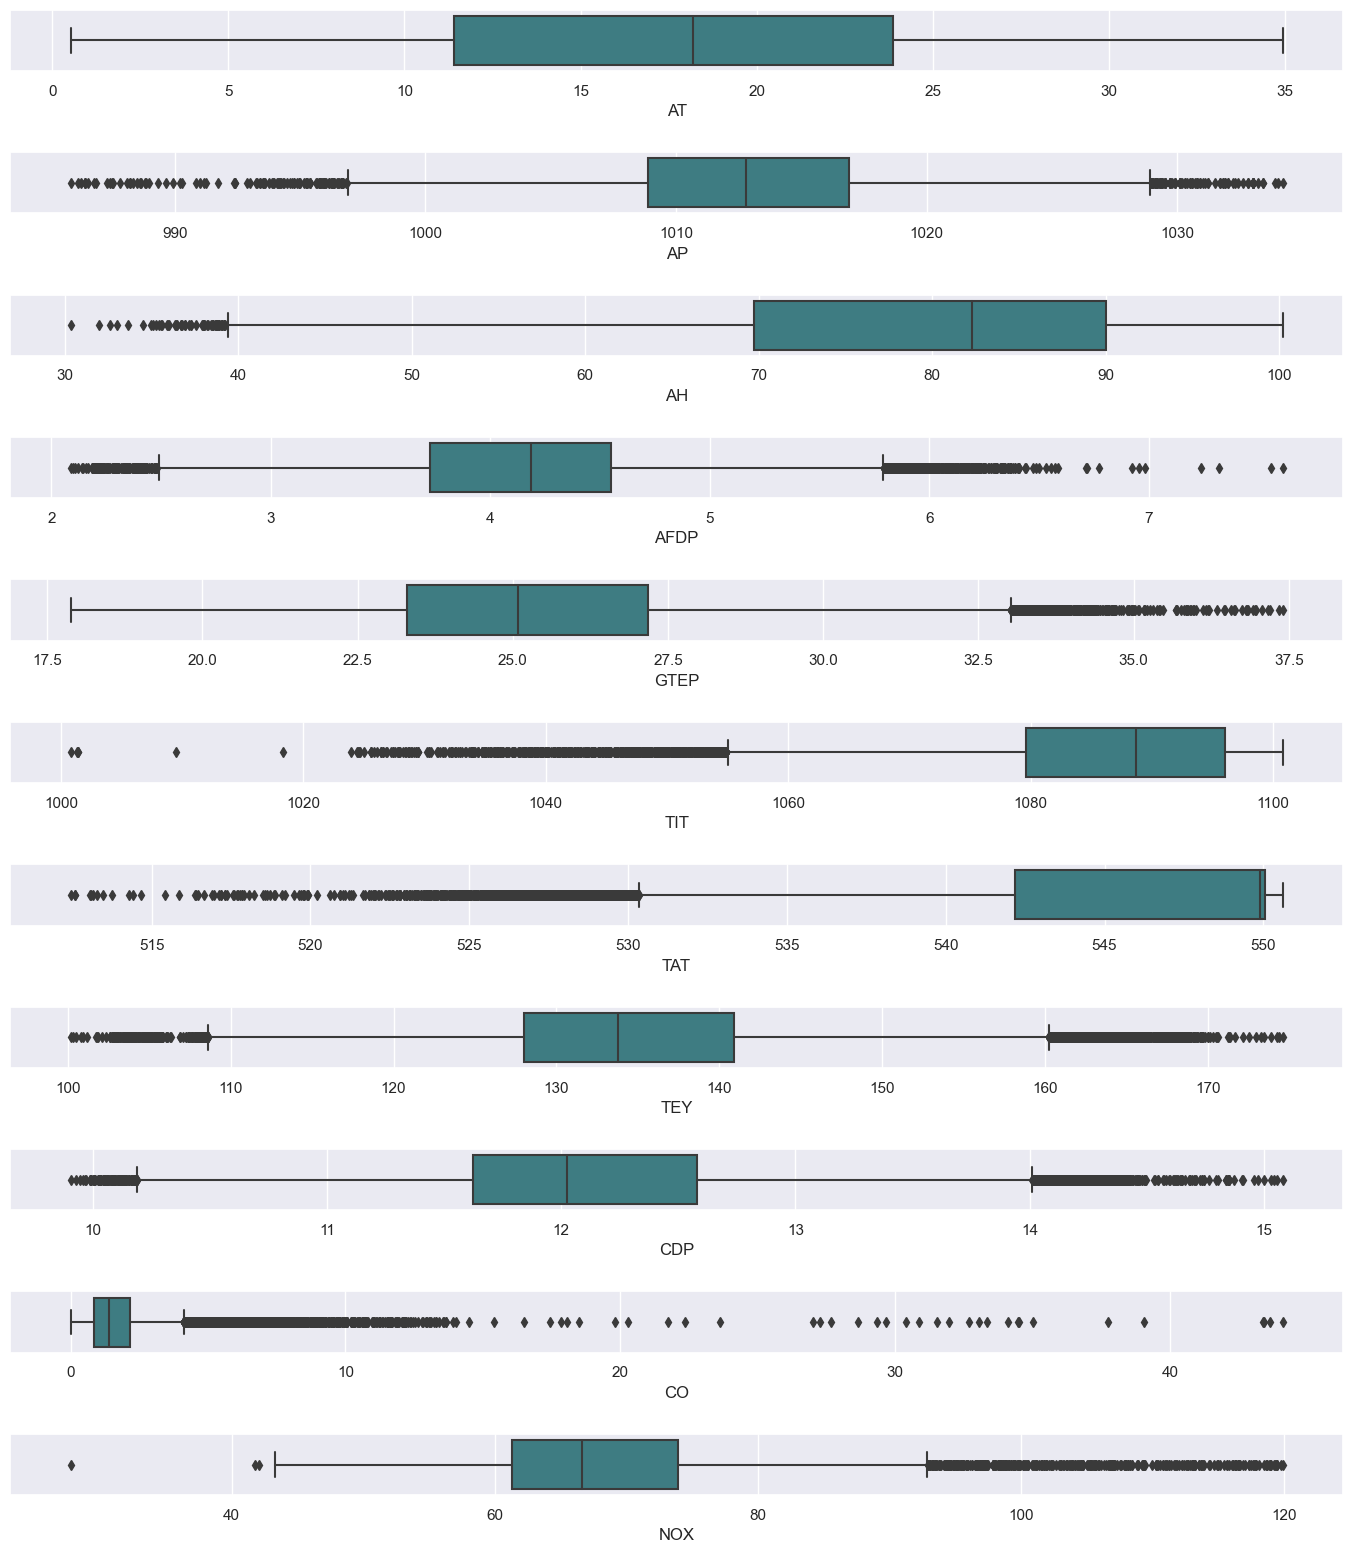

In [9]:
# Boxplot for Numerical Variables:
ot=df.copy() 
fig, axes = plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<Axes: xlabel='TEY', ylabel='Density'>

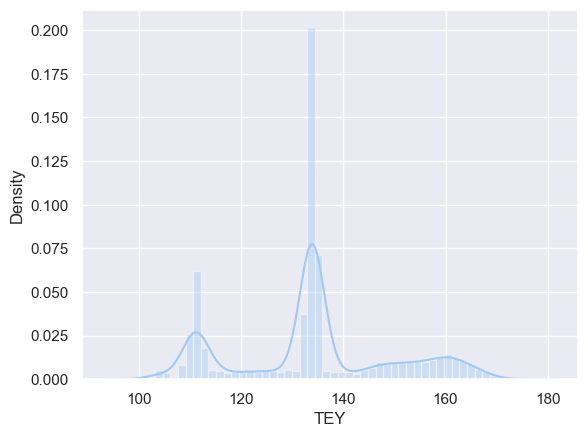

In [10]:
# Plottig Target Variable:
sns.distplot(df['TEY'])

> * #### Highly Positively correlated Variables: "AFDP" and "GTEP", "CDP" & "GTEP", "CDP" & "TIT", "CDP" & "AFDP", "CDP" & "TEY", "TEY" & "TIT", "TEY" & "AFDP", "TIT" & "GTEP", "TIT" & "AFDP"
> * #### Strongly Negatively Correlated Variables: "GTEP" & "TAT", "TIT" & "CO", "TAT" & "CDP", "TAT" & "TEY", "AFDP" & "TAT", "AT" & "NOX"
> * #### From boxplot visualization we can observe except "AT" all other have outliers.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

In [11]:
x = df.drop(columns = {'TEY'})
y = df['TEY']

### <font color = "green">➡ Standardisation:

In [12]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

### <font color = "green">➡ Train Test Split 

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.25, random_state= 42)

In [14]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (11279, 10)
Shape of x_test:  (3760, 10)
Shape of y_train:  (11279,)
Shape of y_test (3760,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [15]:
# since we have continuous ouput, AF is not required in the o/p layer
ann = Sequential()
ann.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal')) # input layer
ann.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
ann.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

ann.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
ann.fit(xtrain, ytrain, batch_size=50, validation_split=0.3, epochs = 100, verbose = 1 )



Epoch 1/100


158/158 [==============================] - 4s 9ms/step - loss: 17650.1367 - mae: 131.8936 - mse: 17650.1367 - val_loss: 16848.6504 - val_mae: 128.8466 - val_mse: 16848.6504
Epoch 2/100
158/158 [==============================] - 1s 6ms/step - loss: 16390.5742 - mae: 127.0340 - mse: 16390.5762 - val_loss: 15859.7607 - val_mae: 124.9501 - val_mse: 15859.7607
Epoch 3/100
158/158 [==============================] - 1s 6ms/step - loss: 15473.6670 - mae: 123.3744 - mse: 15473.6670 - val_loss: 14995.1240 - val_mae: 121.4409 - val_mse: 14995.1240
Epoch 4/100
158/158 [==============================] - 1s 6ms/step - loss: 14639.4502 - mae: 119.9462 - mse: 14639.4502 - val_loss: 14190.7119 - val_mae: 118.0825 - val_mse: 14190.7119
Epoch 5/100
158/158 [==============================] - 1s 5ms/step - loss: 13855.5713 - mae: 116.6332 - mse: 13855.5713 - val_loss: 13428.6914 - val_mae: 114.8105 - val_mse: 13428.6914
Epoch 6/100
158/158 [==============================] - 1s 5ms/step - lo

Epoch 42/100
158/158 [==============================] - 1s 6ms/step - loss: 676.7966 - mae: 21.8228 - mse: 676.7966 - val_loss: 627.5994 - val_mae: 21.0945 - val_mse: 627.5994
Epoch 43/100
158/158 [==============================] - 1s 6ms/step - loss: 605.1779 - mae: 20.6927 - mse: 605.1779 - val_loss: 561.1927 - val_mae: 20.0195 - val_mse: 561.1927
Epoch 44/100
158/158 [==============================] - 1s 6ms/step - loss: 542.4365 - mae: 19.6269 - mse: 542.4365 - val_loss: 503.4863 - val_mae: 19.0124 - val_mse: 503.4863
Epoch 45/100
158/158 [==============================] - 1s 6ms/step - loss: 488.0052 - mae: 18.6362 - mse: 488.0052 - val_loss: 453.6099 - val_mae: 18.0601 - val_mse: 453.6099
Epoch 46/100
158/158 [==============================] - 1s 6ms/step - loss: 441.3477 - mae: 17.7093 - mse: 441.3477 - val_loss: 411.1551 - val_mae: 17.1682 - val_mse: 411.1551
Epoch 47/100
158/158 [==============================] - 1s 6ms/step - loss: 401.8161 - mae: 16.8532 - mse: 401.8161 - va

### <font color = "green">➡ Plotting Train Test Error:

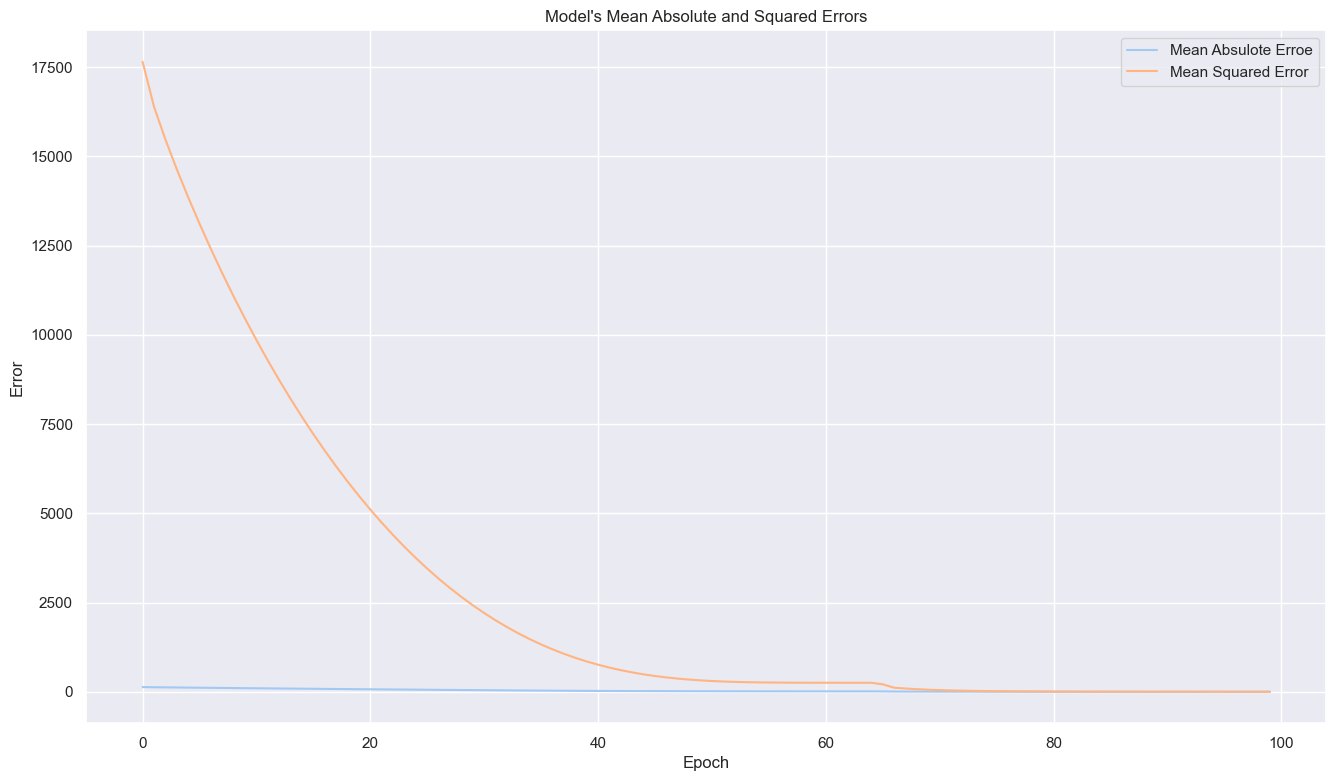

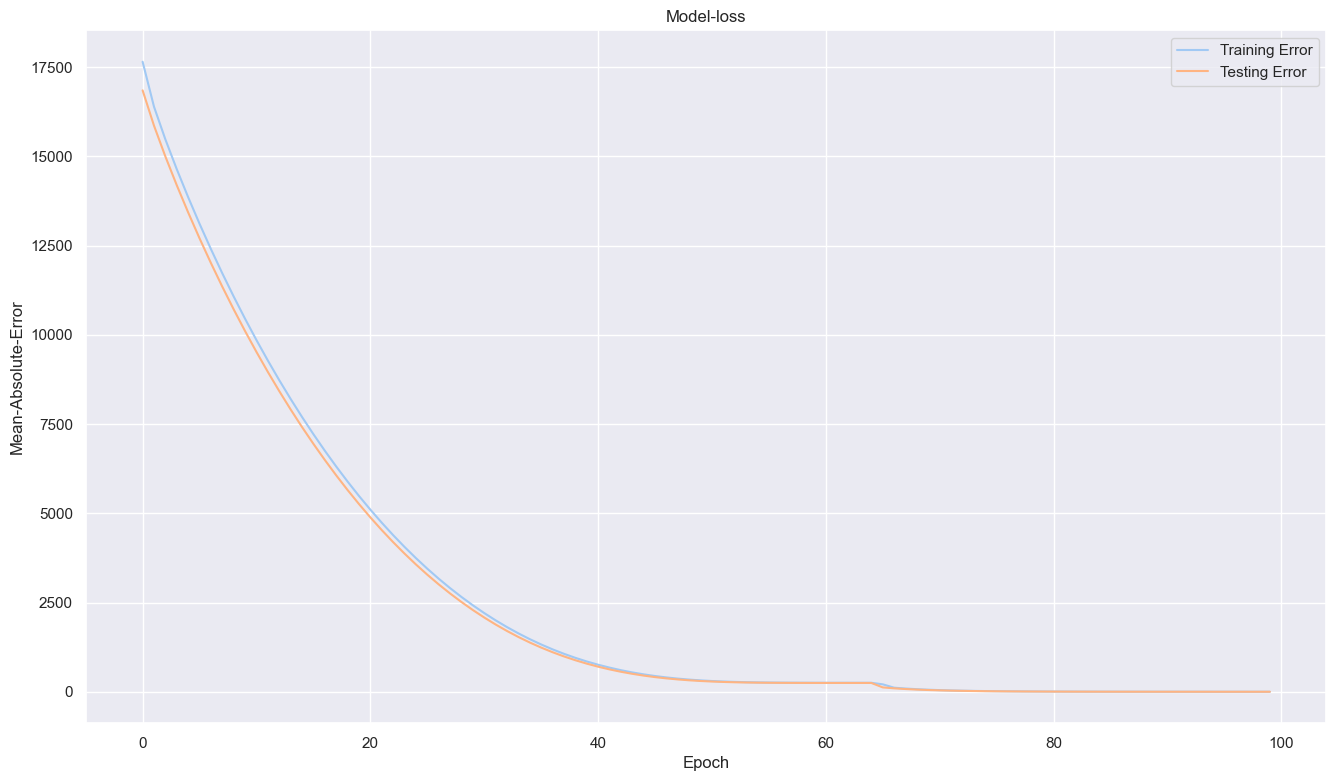

In [16]:
plt.figure(figsize=(16,9))
plt.plot(ann.history.history['mae'])
plt.plot(ann.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper right')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(ann.history.history['loss'])
plt.plot(ann.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper right')
plt.show()

In [17]:
ypred = ann.predict(xtest)

118/118 [==============================] - 1s 3ms/step


In [18]:
ann.evaluate(xtest, ytest)

118/118 [==============================] - 0s 3ms/step - loss: 0.6623 - mae: 0.5259 - mse: 0.6623


[0.6622902750968933, 0.5258820652961731, 0.6622902750968933]

In [19]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(ytest, ypred))
print ("MSE:", mean_squared_error(ytest,ypred))
print("RMSE:", np.sqrt(mean_squared_error(ytest,ypred)))
print("R2_Score:", r2_score(ytest, ypred))

MAE: 0.5258820586508896
MSE: 0.6622903034923768
RMSE: 0.8138122040694504
R2_Score: 0.9973629978885741


* ### <font color = 'blue'> <u> CONCLUSION </u>
    
> * #### With ANN model we get 0.99 R-Squared Value, R-Squared Value near to one indicating good accuracy model.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___